In [772]:
import copy
import warnings
import numpy   as np
import pandas  as pd
import seaborn as sea
import matplotlib.pyplot as plt
from   scipy.stats       import probplot, kstest

In [773]:
from sklearn.exceptions import FitFailedWarning,ConvergenceWarning
warnings.filterwarnings('ignore',category=FitFailedWarning)
warnings.filterwarnings('ignore',category=ConvergenceWarning)

In [774]:
data = pd.read_csv('/content/data.csv',sep=',')

In [775]:
data.head(2)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.5,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.5,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA


&nbsp;

## Analise dos dados

In [776]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [777]:
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


> Features passaram por normalização|padronização

In [778]:
data.isna().nunique()

date             1
price            1
bedrooms         1
bathrooms        1
sqft_living      1
sqft_lot         1
floors           1
waterfront       1
view             1
condition        1
sqft_above       1
sqft_basement    1
yr_built         1
yr_renovated     1
street           1
city             1
statezip         1
country          1
dtype: int64

> Não há valores nulos no conj. de dados

## Analisando cada coluna cada colunas

### Colunas categoricas

In [779]:
# Atributos que são categoricos
data.select_dtypes(exclude=[int, float]).columns

Index(['date', 'street', 'city', 'statezip', 'country'], dtype='object')

#### Country

In [780]:
data['country'].nunique()

1

In [781]:
data['country'].value_counts().reset_index()

,country,count
0,USA,4600


> O atributos country é redundante pois só há um valor único será removido no pré-processamento

#### Cities

In [782]:
data['city'].nunique()

44

> Há muitos valores será feito a correlação entre target e essa coluna

### StateZip

In [783]:
data['statezip'].nunique()

77

### street

In [784]:
data['street'].nunique()

4525

### Date

In [785]:
data['date'].nunique()

70

In [786]:
data['date'] = pd.to_datetime(data['date'])

Verificando a serie historica da media de precos de

In [787]:
subset = data[['date','price']]

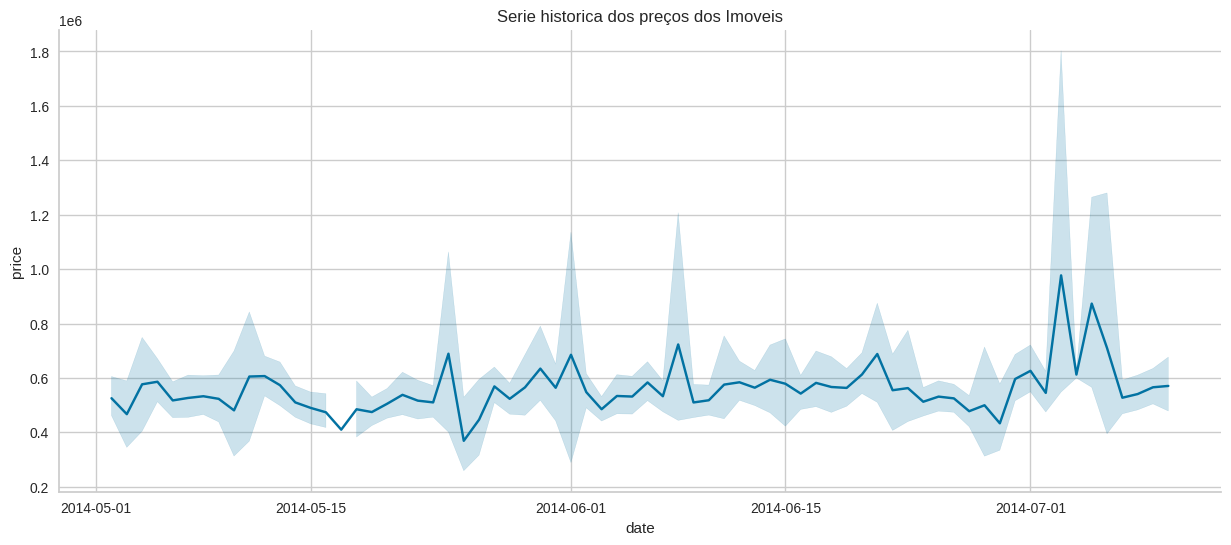

In [788]:
plt.figure(figsize=(15, 6))
plt.title('Serie historica dos preços dos Imoveis')
sea.lineplot(subset, x='date', y='price')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.gca().grid(True, axis='y')
plt.show()

> **Obs**:No futuro irei utilizar series temporais para resolver esse problema...

### Analisando price

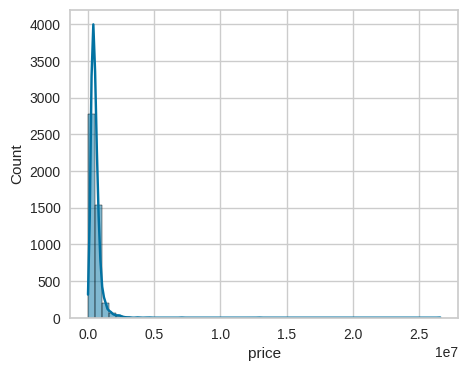

In [789]:
plt.figure(figsize=(5,4))
sea.histplot(data['price'], kde=True, bins=50)
plt.show()

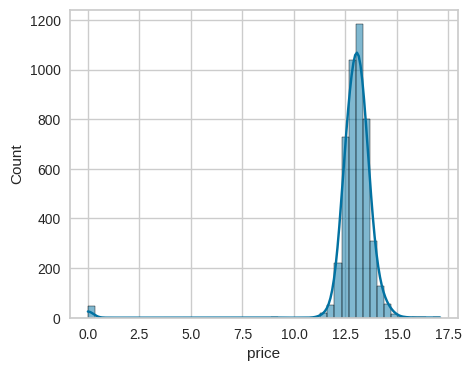

In [790]:
plt.figure(figsize=(5,4))
sea.histplot(np.log1p(data['price']), kde=True, bins=50)
plt.show()

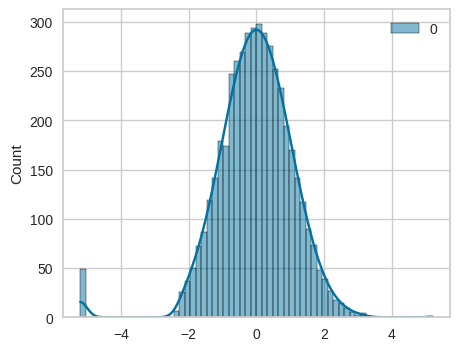

In [791]:
from sklearn.preprocessing import QuantileTransformer

a = QuantileTransformer(output_distribution='normal').fit_transform(data['price'].values.reshape(-1,1))

plt.figure(figsize=(5,4))
sea.histplot(a, kde=True)
plt.show()

> O atributo alvo será transformado

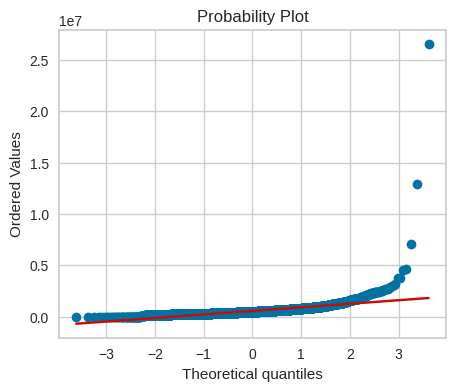

In [792]:
plt.figure(figsize=(5,4))
probplot(data['price'], dist='norm', plot=plt)
plt.show()

In [793]:
print(kstest(data['price'], 'norm')[:2])

(0.9893478260869565, 0.0)


> Dados não seguem uma normal

In [794]:
data['price'].min()

0.0

In [795]:
data.loc[data['price']<=0].shape

(49, 18)

> **Dados Incosistente**:Não faz sentido uma pessoa vender um imovel de graça será removido do conj. dados

### Para Sqrt_living|above e year_build

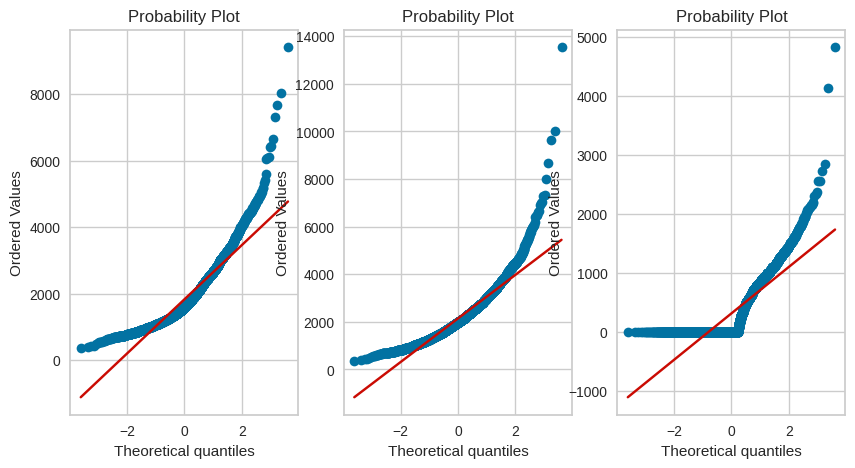

In [796]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10,5))
probplot(data['sqft_above' ], dist='norm', plot=ax[0])
probplot(data['sqft_living'], dist='norm', plot=ax[1])
probplot(data['sqft_basement'], dist='norm', plot=ax[2])

plt.show()

> Não seguem uma normal

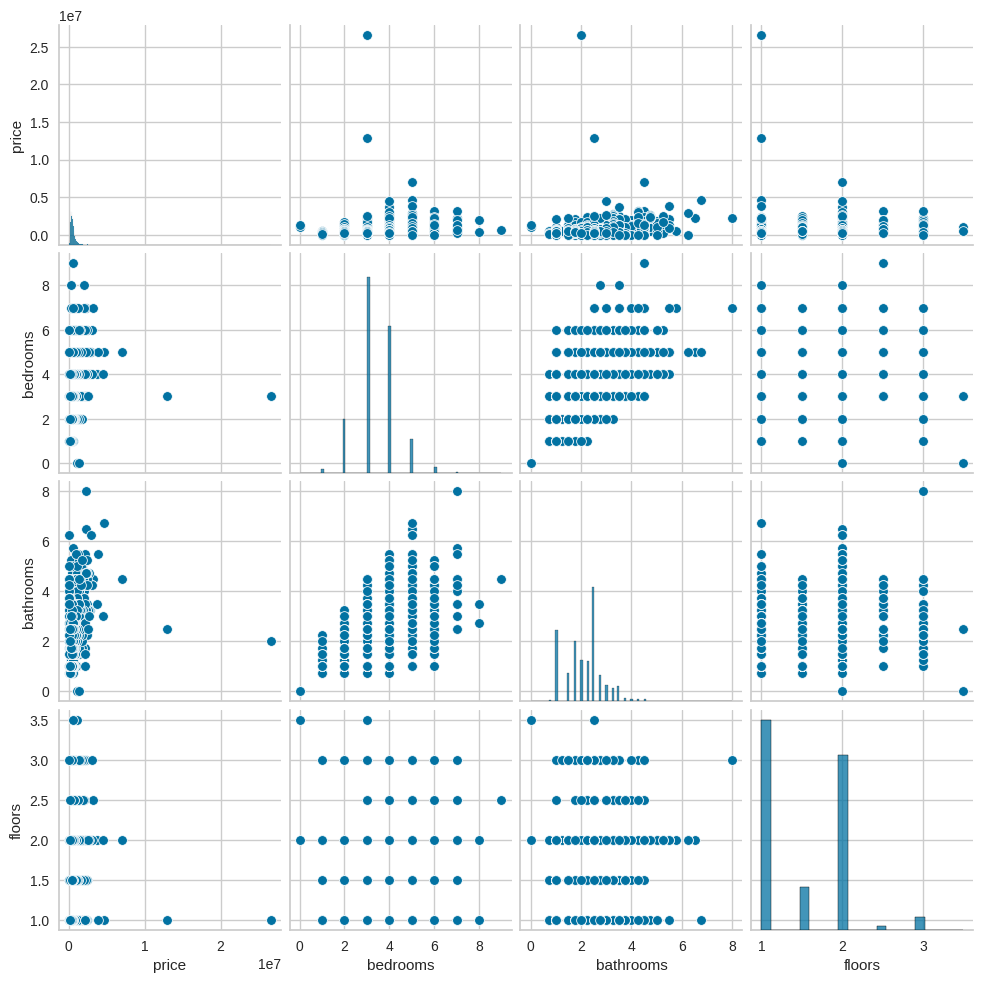

In [797]:
sea.pairplot(data.select_dtypes(exclude=['object','int']))
plt.show()

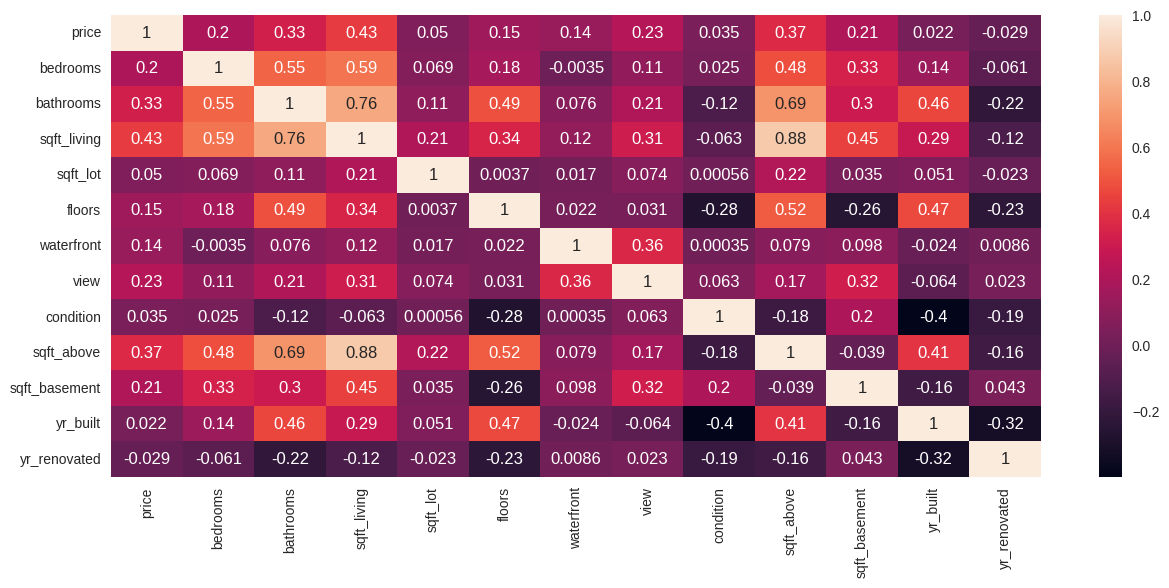

In [798]:
plt.figure(figsize=(15,6))
sea.heatmap(data.select_dtypes(exclude=['object','datetime']).corr(),annot=True)
plt.show()

A classe irá dar correlação entre valores categoricos e valores numericos

In [799]:
from scipy.stats import  pointbiserialr
from scipy.stats.contingency import chi2_contingency, association
from sklearn.preprocessing   import LabelEncoder
class Correlation:
    M_ = None

    def __init__(self, column1:list, column2:list, data:pd.DataFrame):
        self.column_names1 = column1
        self.column_names2 = column2
        self.data          = data
        self.tupla         = ( len(column1) , len(column2) )
        self.M_ = np.zeros(shape=self.tupla)

    def Encoder(self, X):
        return LabelEncoder().fit_transform(X)
    def pointBisserl(self):

        for enum_i, i in enumerate(self.column_names1):
            for enum_j, j in enumerate(self.column_names2):

                values_i = self.data[i].values
                values_j = self.data[j].values

                if values_i.dtype=='object':
                    values_i =  self.Encoder(values_i)
                if values_j.dtype=='object':
                    values_j =  self.Encoder(values_j)

                corr, _ = pointbiserialr(values_i, values_j)
                self.M_[enum_i, enum_j] = corr

        return pd.DataFrame(
            data    = self.M_.T,
            columns = self.column_names1,
            index   = self.column_names2
        )

In [800]:
cat = data.select_dtypes(exclude=['int','float','datetime64[ns]']).columns[:3].tolist()
cat

['street', 'city', 'statezip']

In [801]:
Correlation(cat, ['price'], data).pointBisserl()

,street,city,statezip
price,0.029366,0.018625,-0.043385


> Os atributos categoricos tem baixa relação com os preços então será removido no pre-processamento

&nbsp;

## Pré-processamento

Essas classes serão usada para o pre-processamento, automatizo o processo e facilito quando eu quiser rodar denovo.

In [802]:
from sklearn.base          import BaseEstimator,TransformerMixin
from sklearn.preprocessing import MinMaxScaler,StandardScaler,LabelEncoder

In [803]:
class RemovendoAtributos(BaseEstimator,TransformerMixin):
    def __init__(self,columns:list) -> None:
        self.columns = columns

    def fit(self,X,y=None):
        return self

    def transform(self,X,y=None):
        return X.drop(columns=self.columns,axis=0)

In [804]:
class CriandoAtributos(BaseEstimator,TransformerMixin):
    def __init__(self):
        self.columns = ['date','yr_built','yr_renovated']

    def fit(self,X,y=None):
        return self

    def transform(self,X:pd.DataFrame,y=None):

        X[self.columns[0]] = pd.to_datetime(X[self.columns[0]])
        X['YearHouse' ] = X[self.columns[0]].dt.year - abs( X[self.columns[1]] )
        return X

In [806]:
class TransformandoAtributos(BaseEstimator,TransformerMixin):
    def __init__(self,columns:list|str):
        self.columns = columns

    def fit(self,X,y=None):
        return self

    def transform(self,X,y=None):
        if (type(self.columns) == list):
            X[self.columns] = LabelEncoder().fit_transform(X[self.columns])
        else:
            X[self.columns] = LabelEncoder().fit_transform(X[self.columns].values)
        return X

In [807]:
class Padronizacao(BaseEstimator,TransformerMixin):
    def __init__(self,columns:list | str) -> None:
        self.columns = columns

    def fit(self,X,y=None):
        return self

    def transform(self, X:pd.DataFrame):
        if ( type(self.columns) == list ):
            X[self.columns]   = StandardScaler().fit_transform(X[self.columns])
        else:
            X[[self.columns]] = StandardScaler().fit_transform(X[[self.columns]])
        return X

In [808]:
class Teto(BaseEstimator,TransformerMixin):
    def __init__(self,columns:list) -> None:
        self.columns = columns

    def fit(self,X,y=None):
        return self

    def transform(self, X:pd.DataFrame):
        for column in self.columns:
            X[column] = np.floor(X[column].values)
        return X

In [809]:
class Dummies(BaseEstimator,TransformerMixin):
    def __init__(self,columns:list | str) -> None:
        self.columns = columns

    def fit(self,X,y=None):
        return self

    def transform(self, X:pd.DataFrame):
        return pd.get_dummies(X,columns=self.columns,dtype=int)

In [810]:
class DadosIncosistente(BaseEstimator,TransformerMixin):
    def __init__(self,index:list) -> None:
        self.self.index = index

    def fit(self,X,y=None):
        return self

    def transform(self, X:pd.DataFrame):
        X.drop(index=self.index, inplace=True)
        return X


Target passará por uma transformação logaritmica

In [811]:
class TransformancaoTarget(BaseEstimator,TransformerMixin):
    def __init__(self, column, dtype=1):
        self.column = column
        self.dtype  = dtype

    def fit(self,X,y=None):
        return self

    def transform(self,X:pd.DataFrame,y=None):
        X = X.drop(index=X.loc[X[self.column]==0].index,axis=1)

        if self.dtype == 1:
            X['price'] = np.log1p(X[self.column])
        else:
            transformation = QuantileTransformer(output_distribution='normal', random_state=42)
            X['price']= transformation.fit_transform(X['price'].values.reshape(-1,1))


        return X

> Porque o atributo alvo tera transformacao logaritma|normal:

[Geek for Geek](https://www.geeksforgeeks.org/effect-of-transforming-the-targets-in-regression-model/)

[SkLearn](https://scikit-learn.org/stable/auto_examples/compose/plot_transformed_target.html#sphx-glr-download-auto-examples-compose-plot-transformed-target-py)

[referencias]

## Previsão

In [812]:
train = pd.read_csv('/content/data.csv')
test  = pd.read_csv('/content/output.csv')

In [813]:
from sklearn.metrics      import *
from sklearn.pipeline     import Pipeline
from sklearn.linear_model import SGDRegressor,LinearRegression,Ridge,ElasticNet
from sklearn.svm          import SVR
from sklearn.ensemble     import VotingRegressor
from sklearn.base         import clone
from sklearn.model_selection import (
    StratifiedShuffleSplit,
    train_test_split,
    cross_val_score ,
    GroupKFold      ,
    GridSearchCV    ,
    KFold
)

Pipeline de pré-processamento de dados

In [815]:
pipeline = Pipeline(
    steps=[
        ('Tranformacao Log',
            TransformancaoTarget('price', 0),
         ),
        ('Padronização'        ,
            Padronizacao([
                'sqft_living','sqft_lot',
                'sqft_above','sqft_basement'])),
        ('RemovendoAtributos'  ,
            RemovendoAtributos([
                'country','street',
                'statezip','date',
                'yr_built','yr_renovated'])),
        ('Teto'                ,
            Teto(['bathrooms','floors'])),
        ('Dummies'             ,
            Dummies(['bedrooms','bathrooms',
                     'waterfront','view',
                     'condition','city',
                     'floors']))
        ]
)

In [816]:
dataset = pd.concat([train,test],axis=0)
dataset = pipeline.fit_transform(dataset)

In [817]:
X = dataset.drop(columns='price',axis=0)
Y = dataset['price']

In [818]:
xtrain , xtest , ytrain , ytest = train_test_split(X,Y,test_size=0.25,random_state=42)

&nbsp;

### Gradiente descendente estocastico regressor

In [819]:
regSGB = SGDRegressor()
regSGB.fit(xtrain,ytrain)

SGDRegressor()

In [820]:
predSGB = regSGB.predict(xtest)

In [821]:
print("Mean Absolute error..:",mean_absolute_error(ytest,predSGB))
print("Mean Squared error...:",mean_squared_error(ytest,predSGB))
print("r2 score.............:",r2_score(ytest,predSGB))

Mean Absolute error..: 0.3808577805345057
Mean Squared error...: 0.3001553890873756
r2 score.............: 0.6994529553024885


In [822]:
kfold = KFold(n_splits=5,shuffle=True,random_state=42)
index = 1

for train,test in kfold.split(X,Y):
    foldreg = clone(regSGB)
    xtrainkf , xtestkf = X.iloc[train],X.iloc[test]
    ytrainkf , ytestkf = Y.iloc[train],Y.iloc[test]

    foldreg.fit(xtrainkf,ytrainkf)
    predfold = foldreg.predict(xtestkf)
    squared  = np.sqrt(mean_squared_error(ytestkf,predfold))
    absolute = mean_absolute_error(ytestkf,predfold)
    print(f'Fold {index} | mean_squared_error : {squared:.5f} | mean_absolute_error: {absolute:5f} | r2 : {r2_score(ytestkf,predfold)}')
    index+=1

Fold 1 | mean_squared_error : 0.54404 | mean_absolute_error: 0.380924 | r2 : 0.6977081354893367
Fold 2 | mean_squared_error : 0.54702 | mean_absolute_error: 0.382138 | r2 : 0.699240560897916
Fold 3 | mean_squared_error : 0.53066 | mean_absolute_error: 0.381482 | r2 : 0.7145552222228415
Fold 4 | mean_squared_error : 0.53583 | mean_absolute_error: 0.379096 | r2 : 0.7171414609853385
Fold 5 | mean_squared_error : 0.57516 | mean_absolute_error: 0.393224 | r2 : 0.6844389558613657


In [823]:
scores =cross_val_score(clone(regSGB),X,Y,cv=kfold,scoring='r2')
print('cross_val_score_mean...:',scores.mean())

cross_val_score_mean...: 0.7017450394012923


&nbsp;

### Regressão Linear

In [824]:
reg = LinearRegression()
reg.fit(xtrain,ytrain)

LinearRegression()

In [825]:
pred = reg.predict(xtest)

In [826]:
print("Mean Absolute error..:",mean_absolute_error(ytest,pred))
print("Mean Squared error...:",np.sqrt(mean_squared_error(ytest,pred)))
print("r2 score.............:",r2_score(ytest,pred))

Mean Absolute error..: 0.36607301812761445
Mean Squared error...: 0.5311340959411672
r2 score.............: 0.7175284714909518


Fazendo validação cruzada

In [827]:
kfold = KFold(n_splits=5,shuffle=True,random_state=42)
index = 1
for train,test in kfold.split(X,Y):
    foldreg = clone(reg)
    xtrainkf , xtestkf = X.iloc[train],X.iloc[test]
    ytrainkf , ytestkf = Y.iloc[train],Y.iloc[test]

    foldreg.fit(xtrainkf,ytrainkf)
    predfold = foldreg.predict(xtestkf)
    squared  = np.sqrt(mean_squared_error(ytestkf,predfold))
    absolute = mean_absolute_error(ytestkf,predfold)
    print(f'Fold {index} | mean_squared_error : {squared:.5f} | mean_absolute_error: {absolute:5f} | R2 : {r2_score(ytestkf,predfold)}')
    index+=1

Fold 1 | mean_squared_error : 0.53297 | mean_absolute_error: 0.371440 | R2 : 0.7098803609562694
Fold 2 | mean_squared_error : 0.51856 | mean_absolute_error: 0.355653 | R2 : 0.7297243952009593
Fold 3 | mean_squared_error : 593866339.55907 | mean_absolute_error: 19686477.825864 | R2 : -3.5749313132452205e+17
Fold 4 | mean_squared_error : 0.52896 | mean_absolute_error: 0.366714 | R2 : 0.7243554336116671
Fold 5 | mean_squared_error : 0.55238 | mean_absolute_error: 0.374189 | R2 : 0.7089399901950388


In [828]:
scores =cross_val_score(clone(reg),X,Y,cv=kfold,scoring='r2')
print('cross_val_score_mean..:',scores.mean())

cross_val_score_mean..: -7.149862626490441e+16


> A regressão linear não esta generalizando bem se deve pois um modelo de regressão precisa de um pouco de regularização

&nbsp;

### SVM

In [829]:
svmr = SVR(kernel='poly',degree=2,coef0=10)
svmr.fit(xtrain,ytrain)

SVR(coef0=10, degree=2, kernel='poly')

In [830]:
predSVMR = svmr.predict(xtest)

In [831]:
print("Mean Absolute error..:",mean_absolute_error(ytest,predSVMR))
print("Mean Squared error...:",np.sqrt(mean_squared_error(ytest,predSVMR)))
print("r2 score.............:",r2_score(ytest,predSVMR))

Mean Absolute error..: 0.3247471988380223
Mean Squared error...: 0.4964613176537403
r2 score.............: 0.7532045504484026


In [832]:
scores =cross_val_score(clone(svmr),X,Y,cv=kfold,scoring='r2')
print('cross_val_score_mean..:',scores.mean())

cross_val_score_mean..: 0.7548207216952313


&nbsp;

### Ridge

In [833]:
params = dict(
    alpha  = np.linspace(1,1.9,8),
    solver = ['svd', 'cholesky']
)
gridRidge = GridSearchCV(estimator=Ridge(),param_grid=params,scoring='neg_mean_absolute_error')
gridRidge.fit(xtrain,ytrain)

print(gridRidge.best_estimator_)
print(gridRidge.best_score_)

Ridge(solver='svd')
-0.3679082407811737


In [834]:
ridge = gridRidge.best_estimator_
ridge.fit(xtrain,ytrain)

Ridge(solver='svd')

In [835]:
predRidge = ridge.predict(xtest)

In [836]:
print("Mean Absolute error..:",mean_absolute_error(ytest,predRidge))
print("Mean Squared error...:",np.sqrt(mean_squared_error(ytest,predRidge)))
print("r2 score.............:",r2_score(ytest,predRidge))

Mean Absolute error..: 0.3663443734209228
Mean Squared error...: 0.531258678336727
r2 score.............: 0.7173959433510628


In [837]:
kfold = KFold(n_splits=5,shuffle=True,random_state=42)
index = 1
for train,test in kfold.split(X,Y):
    foldreg = clone(ridge)
    xtrainkf , xtestkf = X.iloc[train],X.iloc[test]
    ytrainkf , ytestkf = Y.iloc[train],Y.iloc[test]

    foldreg.fit(xtrainkf,ytrainkf)
    predfold = foldreg.predict(xtestkf)
    squared  = np.sqrt(mean_squared_error(ytestkf,predfold))
    absolute = mean_absolute_error(ytestkf,predfold)
    print(f'Fold {index} | mean_squared_error : {squared:.5f} | mean_absolute_error: {absolute:5f} | r2 : {r2_score(ytestkf,predfold)}')
    index+=1

Fold 1 | mean_squared_error : 0.53243 | mean_absolute_error: 0.371209 | r2 : 0.7104706832366435
Fold 2 | mean_squared_error : 0.51503 | mean_absolute_error: 0.355916 | r2 : 0.7333831339038792
Fold 3 | mean_squared_error : 0.51477 | mean_absolute_error: 0.366396 | r2 : 0.7313915104297133
Fold 4 | mean_squared_error : 0.52828 | mean_absolute_error: 0.366773 | r2 : 0.7250632571395015
Fold 5 | mean_squared_error : 0.55403 | mean_absolute_error: 0.375717 | r2 : 0.7072048266319735


In [838]:
scores = cross_val_score(clone(ridge),X,Y,cv=kfold,scoring='r2')
print('cross_val_score_mean..:',scores.mean())

cross_val_score_mean..: 0.7215026822683421


> Está generalizando bem

&nbsp;

### Elastic net

In [839]:
params = dict(
    alpha    = np.linspace(0.0001,0.1,10),
    l1_ratio = np.linspace(0.1,0.9,9)
)
gridElastic = GridSearchCV(ElasticNet(),param_grid=params,scoring='neg_mean_absolute_error')
gridElastic.fit(xtrain,ytrain)

GridSearchCV(estimator=ElasticNet(),
             param_grid={'alpha': array([0.0001, 0.0112, 0.0223, 0.0334, 0.0445, 0.0556, 0.0667, 0.0778,
       0.0889, 0.1   ]),
                         'l1_ratio': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])},
             scoring='neg_mean_absolute_error')

In [840]:
elastic = gridElastic.best_estimator_
elastic.fit(xtrain,ytrain)

ElasticNet(alpha=0.0001, l1_ratio=0.9)

In [841]:
predElastic = elastic.predict(xtest)

In [842]:
print("Mean Absolute error..:",mean_absolute_error(ytest,predElastic))
print("Mean Squared error...:",np.sqrt(mean_squared_error(ytest,predElastic)))
print("r2 score.............:",r2_score(ytest,predElastic))

Mean Absolute error..: 0.366350774871383
Mean Squared error...: 0.5314445294018455
r2 score.............: 0.7171981811156372


In [843]:
kfold = KFold(n_splits=5,shuffle=True,random_state=42)
index = 1
for train,test in kfold.split(X,Y):
    foldreg = clone(elastic)
    xtrainkf , xtestkf = X.iloc[train],X.iloc[test]
    ytrainkf , ytestkf = Y.iloc[train],Y.iloc[test]

    foldreg.fit(xtrainkf,ytrainkf)
    predfold = foldreg.predict(xtestkf)
    squared  = np.sqrt(mean_squared_error(ytestkf,predfold))
    absolute = mean_absolute_error(ytestkf,predfold)
    print(f'Fold {index} | mean_squared_error : {squared:.5f} | mean_absolute_error: {absolute:5f} | r2 : {r2_score(ytestkf,predfold)}')
    index+=1

Fold 1 | mean_squared_error : 0.53270 | mean_absolute_error: 0.371385 | r2 : 0.7101744047993044
Fold 2 | mean_squared_error : 0.51400 | mean_absolute_error: 0.355652 | r2 : 0.7344508992544727
Fold 3 | mean_squared_error : 0.51507 | mean_absolute_error: 0.366559 | r2 : 0.7310831472930894
Fold 4 | mean_squared_error : 0.52862 | mean_absolute_error: 0.367067 | r2 : 0.724708415831812
Fold 5 | mean_squared_error : 0.55273 | mean_absolute_error: 0.375274 | r2 : 0.7085695764707896


In [844]:
scores =cross_val_score(clone(elastic),X,Y,cv=kfold,scoring='r2')
print('cross_val_score.......:',scores)
print('cross_val_score_mean..:',scores.mean())

cross_val_score.......: [0.7101744  0.7344509  0.73108315 0.72470842 0.70856958]
cross_val_score_mean..: 0.7217972887298937


### Melhores
1. Reg
3. SVM
2. SGB Elastic

In [845]:
regressor = VotingRegressor(
    estimators = [
        ('sgb',regSGB),
        ('svm',svmr),
        ('ridge',ridge),
        ('elastic',elastic)
    ]
)
regressor.fit(xtrain,ytrain)

VotingRegressor(estimators=[('sgb', SGDRegressor()),
                            ('svm', SVR(coef0=10, degree=2, kernel='poly')),
                            ('ridge', Ridge(solver='svd')),
                            ('elastic',
                             ElasticNet(alpha=0.0001, l1_ratio=0.9))])

In [846]:
predVoting = regressor.predict(xtest)

In [847]:
print("Mean Absolute error..:",mean_absolute_error(ytest,predVoting))
print("Mean Squared error...:",np.sqrt(mean_squared_error(ytest,predVoting)))
print("r2 score.............:",r2_score(ytest,predVoting))

Mean Absolute error..: 0.35300716639289387
Mean Squared error...: 0.517891026558146
r2 score.............: 0.7314389112572061


In [848]:
kfold = KFold(n_splits=5,shuffle=True,random_state=42)
index = 1
for train,test in kfold.split(X,Y):
    foldreg = clone(regressor)
    xtrainkf , xtestkf = X.iloc[train],X.iloc[test]
    ytrainkf , ytestkf = Y.iloc[train],Y.iloc[test]

    foldreg.fit(xtrainkf,ytrainkf)
    predfold = foldreg.predict(xtestkf)
    squared  = np.sqrt(mean_squared_error(ytestkf,predfold))
    absolute = mean_absolute_error(ytestkf,predfold)
    print(f'Fold {index} | mean_squared_error : {squared:.5f} | mean_absolute_error: {absolute:5f} | r2 : {r2_score(ytestkf,predfold)}')
    index+=1

Fold 1 | mean_squared_error : 0.51746 | mean_absolute_error: 0.355637 | r2 : 0.7265236700021244
Fold 2 | mean_squared_error : 0.50050 | mean_absolute_error: 0.343508 | r2 : 0.7482161859886695
Fold 3 | mean_squared_error : 0.50025 | mean_absolute_error: 0.354302 | r2 : 0.7463335880305366
Fold 4 | mean_squared_error : 0.51375 | mean_absolute_error: 0.352485 | r2 : 0.7399732894311797
Fold 5 | mean_squared_error : 0.54236 | mean_absolute_error: 0.362695 | r2 : 0.719408855599744


## Rede neural

In [849]:
import keras
import tensorflow as tf
from   functools import partial

In [850]:
xtrain.shape

(6826, 81)

In [893]:
def Model():
    Dense = partial(
        keras.layers.Dense,
        activation = keras.activations.elu,
        kernel_initializer = keras.initializers.he_normal,
    )

    model = keras.models.Sequential(
        layers=[
            Dense(80),
            Dense(40),
            keras.layers.Dropout(rate=0.1),
            Dense(20),
            keras.layers.Dropout(rate=0.1),
            Dense(10),
            keras.layers.Dropout(rate=0.1),
            Dense(5),
            Dense(3),
            keras.layers.Dense(1, kernel_initializer=keras.initializers.he_normal)
        ]
    )
    return model

In [894]:
model = Model()

model.compile(
    optimizer=keras.optimizers.Lion(),
    loss=keras.losses.MAE,
)
stopping = keras.callbacks.EarlyStopping(monitor='loss', patience=3)
history = model.fit(xtrain, ytrain, batch_size=32, epochs=20, validation_split=0.1, callbacks=[stopping])

Epoch 1/20
192/192 [==============================] - 2s 4ms/step - loss: 0.6424 - val_loss: 0.4872
Epoch 2/20
192/192 [==============================] - 0s 3ms/step - loss: 0.4950 - val_loss: 0.4112
Epoch 3/20
192/192 [==============================] - 0s 3ms/step - loss: 0.4340 - val_loss: 0.3803
Epoch 4/20
192/192 [==============================] - 0s 3ms/step - loss: 0.4062 - val_loss: 0.3702
Epoch 5/20
192/192 [==============================] - 1s 5ms/step - loss: 0.3922 - val_loss: 0.3699
Epoch 6/20
192/192 [==============================] - 1s 6ms/step - loss: 0.3859 - val_loss: 0.3672
Epoch 7/20
192/192 [==============================] - 1s 4ms/step - loss: 0.3819 - val_loss: 0.3631
Epoch 8/20
192/192 [==============================] - 1s 3ms/step - loss: 0.3756 - val_loss: 0.3645
Epoch 9/20
192/192 [==============================] - 0s 3ms/step - loss: 0.3745 - val_loss: 0.3607
Epoch 10/20
192/192 [==============================] - 0s 3ms/step - loss: 0.3684 - val_loss: 0.3607

<Axes: >

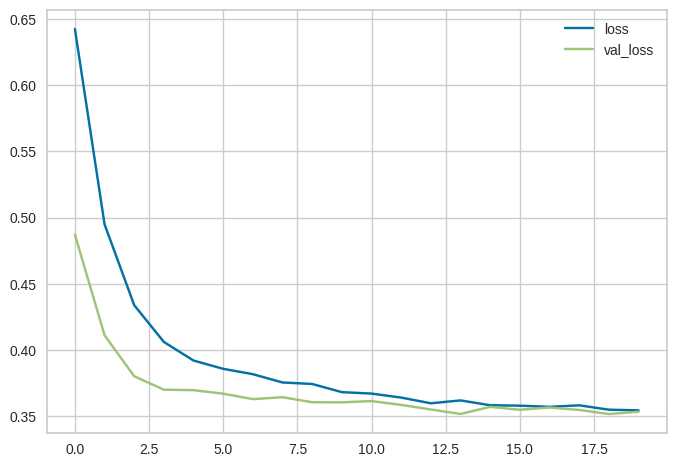

In [895]:
pd.DataFrame(history.history).plot()

In [896]:
pred = model.predict(xtest)

72/72 [==============================] - 0s 2ms/step


In [897]:
print("Mean Absolute error..:",mean_absolute_error(ytest,pred))
print("Mean Squared error...:",mean_squared_error(ytest,pred))
print("r2 score.............:",r2_score(ytest,pred))

Mean Absolute error..: 0.33948256183219083
Mean Squared error...: 0.26107263699773336
r2 score.............: 0.7385867042413361


In [898]:
kfold = KFold(n_splits=5,shuffle=True,random_state=42)
index = 1
for train,test in kfold.split(X,Y):
    foldreg = model
    xtrainkf , xtestkf = X.iloc[train],X.iloc[test]
    ytrainkf , ytestkf = Y.iloc[train],Y.iloc[test]

    stopping = keras.callbacks.EarlyStopping(monitor='loss', patience=3)

    foldreg.fit(xtrain, ytrain, batch_size=32, epochs=20, verbose=0, callbacks=[stopping])
    predfold = foldreg.predict(xtestkf)
    squared  = np.sqrt(mean_squared_error(ytestkf,predfold))
    absolute = mean_absolute_error(ytestkf,predfold)
    print(f'Fold {index} | mean_squared_error : {squared:.5f} | mean_absolute_error: {absolute:5f} | r2 : {r2_score(ytestkf,predfold)}')
    index+=1

57/57 [==============================] - 0s 2ms/step
Fold 1 | mean_squared_error : 0.51236 | mean_absolute_error: 0.341247 | r2 : 0.7318873736732829
57/57 [==============================] - 0s 2ms/step
Fold 2 | mean_squared_error : 0.46324 | mean_absolute_error: 0.301922 | r2 : 0.7843074981170453
57/57 [==============================] - 0s 2ms/step
Fold 3 | mean_squared_error : 0.45055 | mean_absolute_error: 0.303238 | r2 : 0.79423005499237
57/57 [==============================] - 0s 2ms/step
Fold 4 | mean_squared_error : 0.47668 | mean_absolute_error: 0.308148 | r2 : 0.7761515146080518
57/57 [==============================] - 0s 2ms/step
Fold 5 | mean_squared_error : 0.49262 | mean_absolute_error: 0.310419 | r2 : 0.7685098485663766


> Modelo se saiu bem
